In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
titanic_df = pd.read_csv('../data/Titanic-Dataset.csv') 

## Understanding the Dataset

In [141]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

- PassengerId isn't important
- Survived is our target column + is binary(0 or 1). So, we can use algo like logistic
- Pclass basically like first, economic, business class like
- Name isn't important
- Sex and Age can be useful
- SibSp means siblings and spouses
- Only the 1st class had a cabin
- Embarked means on which side did they get on from Southampton or Cherbourg

In [143]:
titanic_df.shape

(891, 12)

In [144]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
titanic_df.duplicated().sum()

np.int64(0)

- There are some missing values which for age we can use mean/median and for cabin we need to transform it
- The Sex is object so we can convert to 0 and 1 

In [147]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [148]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [149]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
titanic_df['cabin_taken'] = titanic_df['Cabin'].notnull().astype(int)

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [151]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [152]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_taken,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


In [153]:
titanic_df['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

- So 1 is along, 2 is travelling with 1 family, 3 is with 2 family...
- We can remove PassengerId, Name, Ticket, Cabin

In [154]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [155]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_taken,Family
0,0,3,0,22.0,7.2500,0.0,0,2
1,1,1,1,38.0,71.2833,1.0,1,2
2,1,3,1,26.0,7.9250,0.0,0,1
3,1,1,1,35.0,53.1000,0.0,1,2
4,0,3,0,35.0,8.0500,0.0,0,1


In [156]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    float64
 6   cabin_taken  891 non-null    int64  
 7   Family       891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [157]:
titanic_df['Age'] = titanic_df['Age'].astype(int)

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df['Embarked'] = titanic_df['Embarked'].astype(int)

We can use corr() to see the relation with our target col now

In [158]:
corr = titanic_df.corr()

In [159]:
titanic_df.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_taken,Family
Survived,1.000000,-0.338481,0.543351,-0.064909,0.257307,0.106811,0.316912,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339999,-0.549500,0.045702,-0.725541,0.065997
Sex,0.543351,-0.131900,1.000000,-0.080750,0.182333,0.116569,0.140391,0.200988
Age,-0.064909,-0.339999,-0.080750,1.000000,0.096838,-0.009539,0.240326,-0.245593
Fare,0.257307,-0.549500,0.182333,0.096838,1.000000,0.062142,0.482075,0.217138
Embarked,0.106811,0.045702,0.116569,-0.009539,0.062142,1.000000,0.013774,-0.080281
cabin_taken,0.316912,-0.725541,0.140391,0.240326,0.482075,0.013774,1.000000,-0.009175
Family,0.016639,0.065997,0.200988,-0.245593,0.217138,-0.080281,-0.009175,1.000000


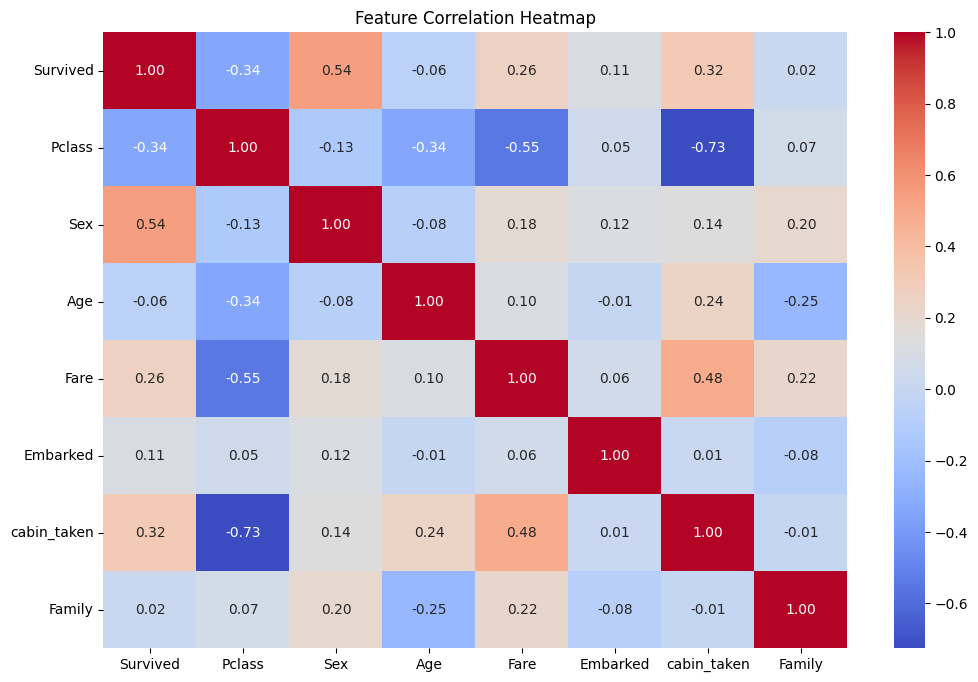

In [160]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

- Sex has a fairly strong relation with Survival and then cabin_taken
- cabin_taken and Pclass has a strong -ve corr so we can just use 1 

In [161]:
titanic_df.drop(columns='cabin_taken', inplace=True)

In [162]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22,7.2500,0,2
1,1,1,1,38,71.2833,1,2
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,2
4,0,3,0,35,8.0500,0,1


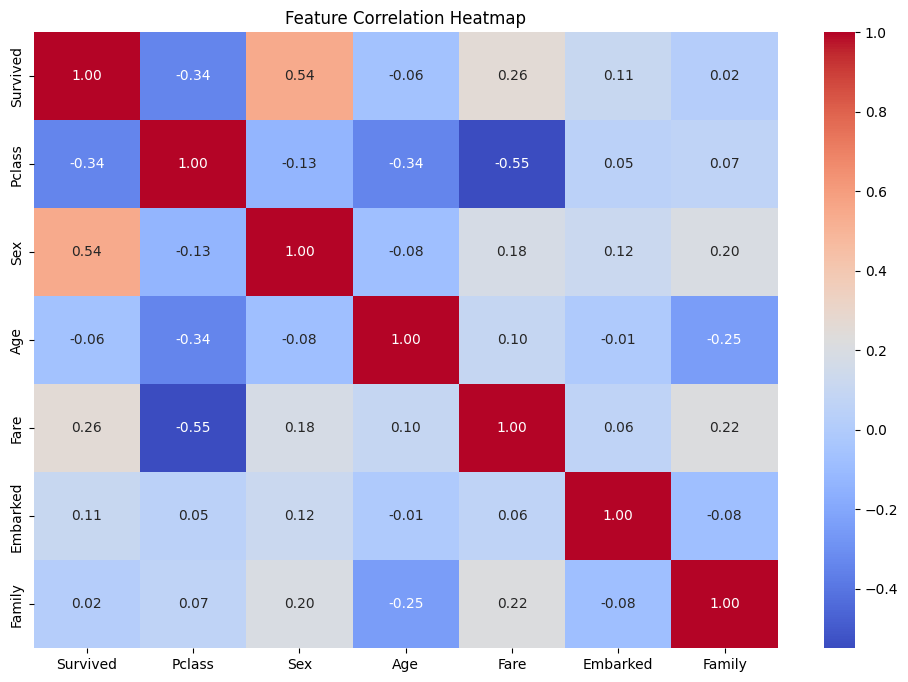

In [163]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## EDA

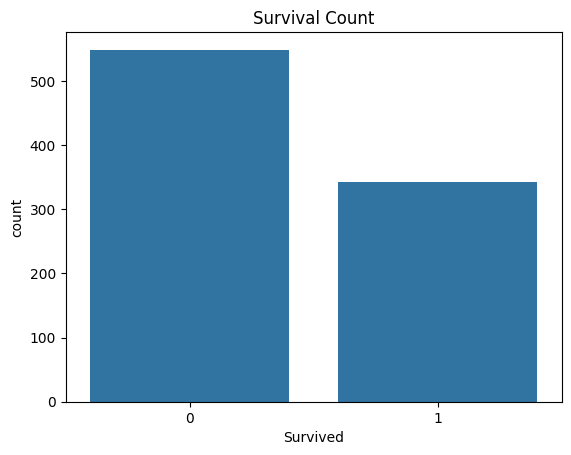

In [164]:
sns.countplot(x='Survived', data=titanic_df)
plt.title("Survival Count")
plt.show()

From total around 340 survived

## By Class

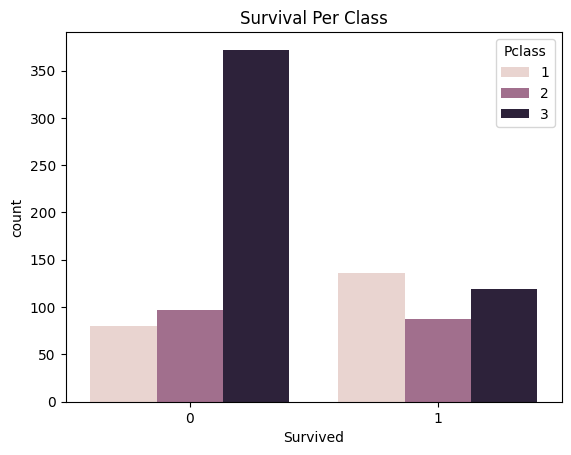

In [165]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title("Survival Per Class")
plt.show()

DeathRate is high for the Pclass 3. For the Pclass 2 its 50-50 whereas Survival rate for Pclass 1 is higher 

## By family size

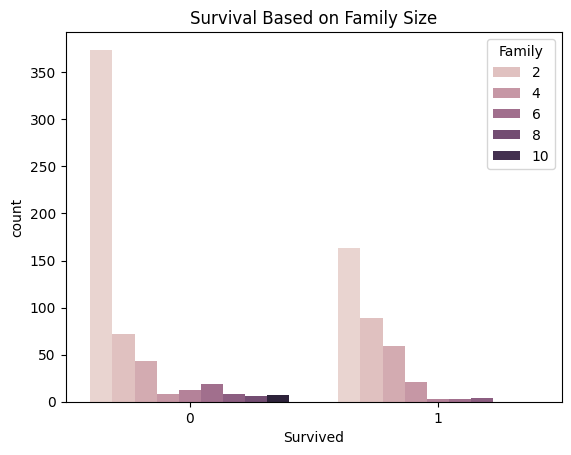

In [166]:
sns.countplot(x='Survived', hue='Family', data=titanic_df)
plt.title("Survival Based on Family Size")
plt.show()

In [167]:
titanic_df.groupby('Family')['Survived'].value_counts()

Family  Survived
1       0           374
        1           163
2       1            89
        0            72
3       1            59
        0            43
4       1            21
        0             8
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
Name: count, dtype: int64

So family with 5,6 had the lowest survival rate

## By Sex

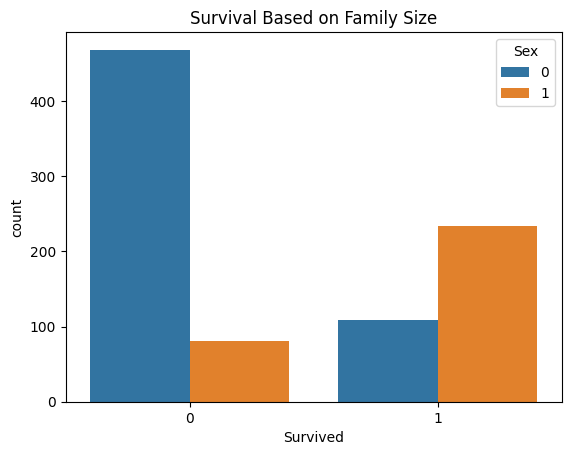

In [168]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title("Survival Based on Family Size")
plt.show()

As after knowing titanic was sinking first female and children were given priority. So survival rate is high for females

## By Embarked

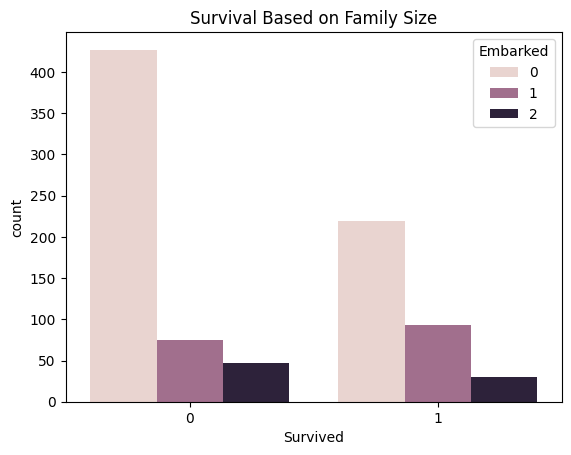

In [169]:
sns.countplot(x='Survived', hue='Embarked', data=titanic_df)
plt.title("Survival Based on Family Size")
plt.show()

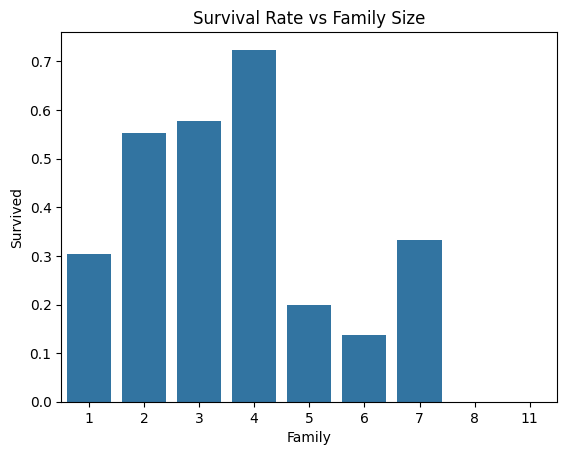

In [170]:
sns.barplot(x='Family', y='Survived', data=titanic_df, errorbar=None)
plt.title("Survival Rate vs Family Size")
plt.show()

Family Size of 4 had more survival rate

In [171]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22,7.2500,0,2
1,1,1,1,38,71.2833,1,2
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,2
4,0,3,0,35,8.0500,0,1


The Dataset is clean

## Algorithms

In [172]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22,7.2500,0,2
1,1,1,1,38,71.2833,1,2
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,2
4,0,3,0,35,8.0500,0,1


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
X_train

array([[-1.61413602, -0.7243102 ,  1.21573263, -0.07868358, -0.54803535,
        -0.55466613],
       [-0.40055118, -0.7243102 , -0.47579658, -0.37714494, -0.54803535,
        -0.55466613],
       [ 0.81303367, -0.7243102 ,  0.21619264, -0.47486697, -0.54803535,
        -0.55466613],
       ...,
       [ 0.81303367, -0.7243102 ,  0.90818186, -0.35580399, -0.54803535,
         0.63485883],
       [-1.61413602,  1.38062393, -1.16778581,  1.68320121, -0.54803535,
         1.22962131],
       [-1.61413602, -0.7243102 , -0.62957197,  0.86074761, -0.54803535,
         0.04009635]], shape=(712, 6))

Normalizing is always a good practice after the train_test split as the scaling happens for training from X_train only which leads to no leaking of unseen data from X_test

## Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log = LogisticRegression(
    C= 0.01,
    solver='lbfgs',
    max_iter=500,
    class_weight='balanced'
)

log.fit(X_train, y_train)

ylog_pred = log.predict(X_test)

score = accuracy_score(y_test, ylog_pred)

print("Accuracy: ", score)

print("\nConfusion Matrix: \n", confusion_matrix(y_test, ylog_pred))

print("\nClassification report: \n", classification_report(y_test, ylog_pred))

Accuracy:  0.7988826815642458

Confusion Matrix: 
 [[85 20]
 [16 58]]

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       105
           1       0.74      0.78      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 0.01, 'solver': 'lbfgs'}
Best CV score: 0.8047473653107456


## Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth= 5,
    max_features='sqrt',
    min_samples_split = 10,
    min_samples_leaf = 1,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

yrf_pred = rf.predict(X_test)

score = accuracy_score(y_test, yrf_pred)

print("Accuracy: ", score)

print("\nConfusion Matrix: \n", confusion_matrix(y_test, yrf_pred))

print("\nClassification report: \n", classification_report(y_test, yrf_pred))

Accuracy:  0.8100558659217877

Confusion Matrix: 
 [[90 15]
 [19 55]]

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [194]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best CV score: 0.8384319905446667


In [206]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',     
    C=1.0,             
    gamma='scale',     
    class_weight='balanced',  
    random_state=42
)

svm_model.fit(X_train, y_train)

y_svm_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))
print("\nClassification Report:\n", classification_report(y_test, y_svm_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[91 14]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.8257953314291344


In [209]:
import pickle

with open('artifacts/rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [210]:
titanic_df.to_csv('artifacts/clean_titanic.csv', index=False)